In [10]:
from io import StringIO
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import subprocess as sb
from matplotlib import rcParams
from matplotlib.colors import LogNorm
import numpy as np

# figure size in inches
rcParams['figure.figsize'] = 16,10
# import holoviews as hv
# hv.extension('matplotlib')
# from pylab import rcParams

# %matplotlib inline
# %matplotlib qt 

# Possible parameters that may be used
pressure = 1000.0 # [Pascal]
temperature = 280.0 # [Kelvin]
ascent = 0.1 # ascent rate [m/s]
qv = 1e-5
qc = 1e-5
qr = 1e-5
qs = 1e-5
qi = 1e-5
qh = 1e-5
qg = 1e-5
temp_crit = 270.0
n_inact = 0 # Number of inactive nuclei
x_i = 1e-7 # mean ice mass [1/g^3]
D_i = 1e-7 # mean ice diameter [1/cm^3]
dep_snow = 1 # deposition rate of snow
dep_ice = 1
# riming rates
rime_qc = 1 
rime_qr = 1
rime_qi = 1
rime_qs = 1

# Possible lower and upper limits for each variable that may be used
p_min = 1000.0
p_max = 200.0 
temp_min = 180.0
temp_max = 320.0
ascent_min = 0.0
ascent_max = 10.0
qv_min = 0.0
qv_max = 1e-2
qc_min = 0.0
qc_max = 1e-2
qr_min = 0.0
qr_max = 1e-2
qs_min = 0.0
qs_max = 1e-2
qi_min = 0.0
qi_max = 1e-2
qh_min = 0.0
qh_max = 1e-2
qg_min = 0.0
qg_max = 1e-2
n_inact_min = 0
n_inact_max = 1e12
x_i_min = 1e-15
x_i_max = 1e-1
D_i_min = 1e-15
D_i_max = 1e-1
dep_snow_min = 0
dep_snow_max = 1
dep_ice_min = 0
dep_ice_max = 1
rime_qc_min = 0 
rime_qr_min = 0
rime_qi_min = 0
rime_qs_min = 0
rime_qc_max = 1 
rime_qr_max = 1
rime_qi_max = 1
rime_qs_max = 1

# Number of bins along each dimension
n1 = 500
n2 = 500
n3 = 500

# Possible ways to test each function
method_dic = {"ccn_act_hande": ["--p_min {} --p_max {} --ascent_min {} --ascent_max {} --temperature {} --qv {} --qc {}".format(
                p_min, p_max, ascent_min, ascent_max, temperature, qv, qc)], #pressure, ascent, temperature, qv, qc
              "ccn_act_seifert": [], # pressure, temperature, qv, qc, qr, height, ascent, saturation
              "ice_nuc_hom": [], # temperature, ascent, pressure, qv, qi
              "ice_activation_hande": [], #qc, qv, temperature, number inactive nuclei
              "ice_activation_phillips": [], # qc, qv, temperature, number of inactive nuclei
              "cloud_freeze_hom": [], # qc, temperature, critical temperature
              "ice_self_collection": [], # qi, mean ice mass, mean ice diameter, critical temperature
              "snow_self_collection": [], # qs, temperature
              "graupel_melting": [], # qg, temperature
              "hail_melting": [], # qh, temperature
              "auto_conversion_kb": [], # qc, qr
              "auto_conversion_sb": [], # qc, qr 
              "rain_self_collection_sb": [], # qr
              "rain_evaporation_sb": [], # qr, qv, temperature, pressure
              "sedimentation_explicit": [], # qc, qr, qs, qi, qh, qg, pressure
              "evaporation": [], # qv, temperature, mixing ratio of ice particle
              "vapor_dep_relaxation": [], # qv, qi, qs, qg, qh, temperature
              "particle_collection": [], # mixing ratio of particle 1 and 2, critical temperature
              "particle_particle_collection": [], # qi, qs, qg, temperature, critical temperature
              "graupel_hail_conv": [], # qc, qr, qi, qg, qh, pressure, temperature, critical temperature
              "hail_collision": [], # qh, qs, qi, critical temperature
              "riming_cloud_core": [], # qc, mixing ratio of ice or snow
              "riming_rain_core": [], # qr, mixing ratio of another particle
              "ice_riming": [], # qc, qr, qi, deposition rate of ice, riming rates of qc, qr, qi, temperature
              "snow_riming": [], # qc, qr, qs, deposition rate of snow, riming rates of qc, qr, qs, temperature
              "particle_cloud_riming": [], # qc, temperature, mixing ratio of second particle
              "particle_rain_riming": [], # qr, temperature, mixing ratio of second particle
              "rain_freeze": [], # qr, temperature
              "ice_melting": ["--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qi_min", "{}".format(qi_min),
                              "--qi_max", "{}".format(qi_max)], # qi, temperature
             }

In [29]:
completed = sb.run(
    ["build/apps/src/scratch/scan", "--function", "ice_melting", 
     "--n1", "{}".format(n1), "--n2", "{}".format(n2)] 
    +  method_dic["ice_melting"],
    capture_output=True,
    encoding="utf-8")
df = pd.read_csv(StringIO(completed.stdout), sep=",")
df.describe()
df

,qi,Ni,T,dt,delta_qi,delta_Ni,delta_qr,delta_Nr,delta_qc,delta_Nc,delta_lat_cool,delta_lat_heat
0,0.00000,0.0,180.00,0.01,-0.000,-0.0,0.000,0.000000e+00,0,0,0.000000e+00,0
1,0.00002,20000.0,180.00,0.01,-0.002,-2000000.0,0.002,2.000000e+06,0,0,-7.525400e-02,0
2,0.00004,40000.0,180.00,0.01,-0.004,-4000000.0,0.006,6.000000e+06,0,0,-2.257620e-01,0
3,0.00006,60000.0,180.00,0.01,-0.006,-6000000.0,0.012,1.200000e+07,0,0,-4.515240e-01,0
4,0.00008,80000.0,180.00,0.01,-0.008,-8000000.0,0.020,2.000000e+07,0,0,-7.525400e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.00990,9900000.0,319.72,0.01,-0.990,-990000000.0,124746.000,1.247460e+14,0,0,-1.627710e+07,0
249996,0.00992,9920000.0,319.72,0.01,-0.992,-992000000.0,124747.000,1.247470e+14,0,0,-1.627730e+07,0
249997,0.00994,9940000.0,319.72,0.01,-0.994,-994000000.0,124748.000,1.247480e+14,0,0,-1.627750e+07,0
249998,0.00996,9960000.0,319.72,0.01,-0.996,-996000000.0,124749.000,1.247490e+14,0,0,-1.627760e+07,0


# Plot what happens when all ice melts to rain droplets

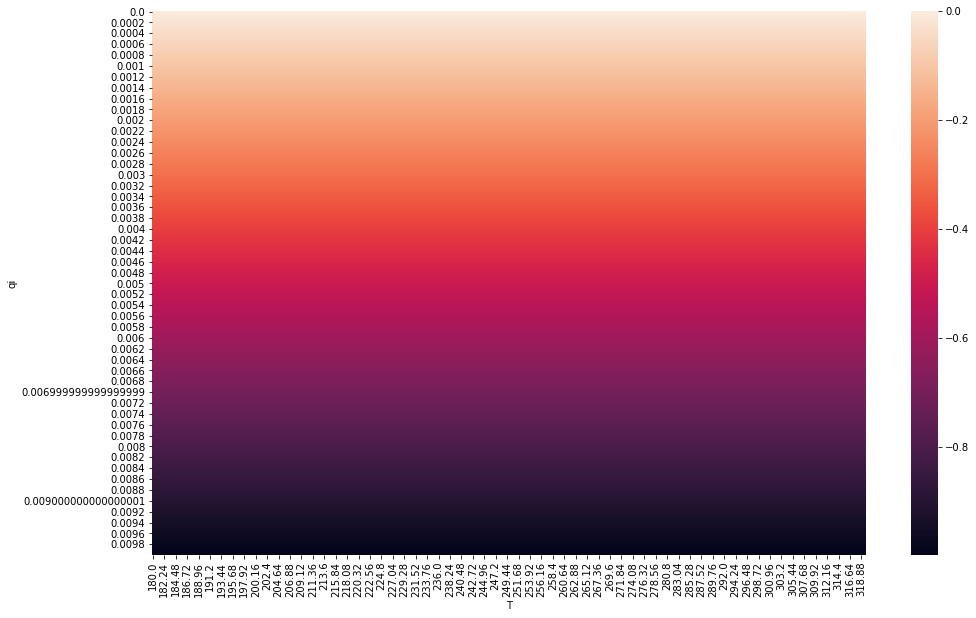

In [30]:

vmin = 0.0001
log_norm = LogNorm(vmin=df["delta_qi"].min()+vmin, vmax=df["delta_qi"].max())

sns.heatmap(df.pivot("qi", "T", "delta_qi"))#, cbar_kws={"ticks": cbar_ticks})

As expected, all ice melts whenever this function is called. Note: This function *must only* be called, when certain temperatures are reached.

In [2]:
completed = sb.run(
    ["build/apps/src/scratch/scan", 
        "ice_act_phillips", "500", "500", "0", "0.001", "250.0", "270", "0"], 
    capture_output=True,
    encoding="utf-8")
df = pd.read_csv(StringIO(completed.stdout), sep=",")
df.describe()

,diag,het,inact,Sat_ice,T,qv,delta_n,delta_q
count,2.500000e+05,250000.0,250000.0,250000.000000,250000.000000,250000.000000,250000.000000,2.500000e+05
mean,1.068206e+07,500000.0,0.0,0.351051,259.980000,0.000499,5219.512888,5.219513e-09
std,1.600683e+08,0.0,0.0,0.286426,5.773503,0.000289,50558.418224,5.055842e-08
min,-1.927480e+03,500000.0,0.0,0.000000,250.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,500000.0,0.0,0.136763,254.990000,0.000249,0.000000,0.000000e+00
50%,0.000000e+00,500000.0,0.0,0.274307,259.980000,0.000499,0.000000,0.000000e+00
75%,0.000000e+00,500000.0,0.0,0.488783,264.970000,0.000749,0.000000,0.000000e+00
max,5.465160e+09,500000.0,0.0,1.514660,269.960000,0.000998,500000.000000,5.000000e-07


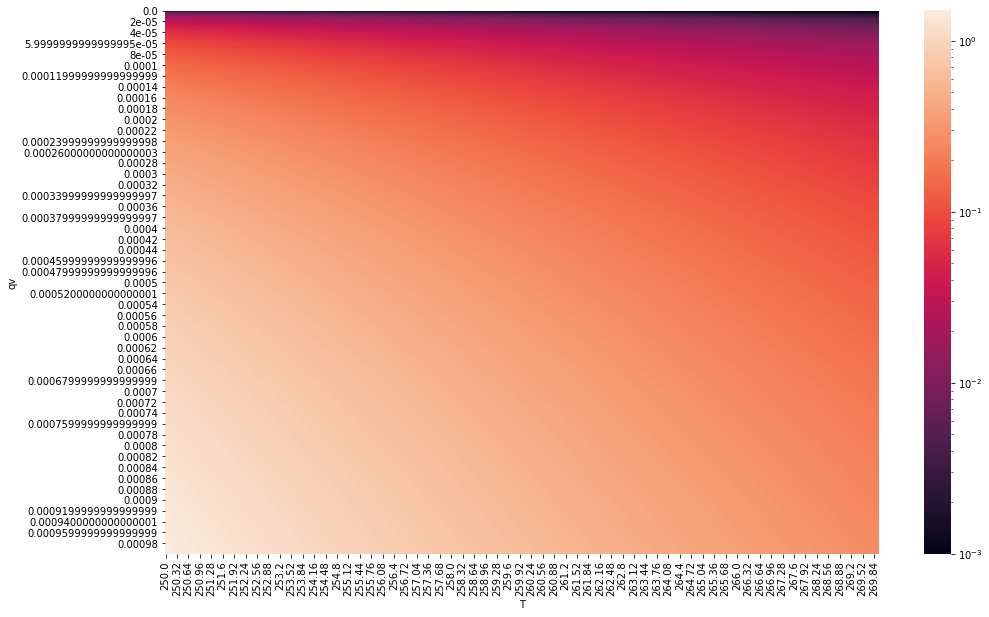

In [3]:
log_norm = LogNorm(vmin=df["Sat_ice"].min()+0.0001, vmax=df["Sat_ice"].max())
# cbar_ticks = [np.power(10, i) for i in 
#               np.arange(np.floor(np.log10(df["Sat_ice"].min()+0.001)), 
#                     1+np.ceil(np.log10(df["Sat_ice"].max())))]

sns.heatmap(df.pivot("qv", "T", "Sat_ice"), norm=log_norm, vmin=0.001)#, cbar_kws={"ticks": cbar_ticks})

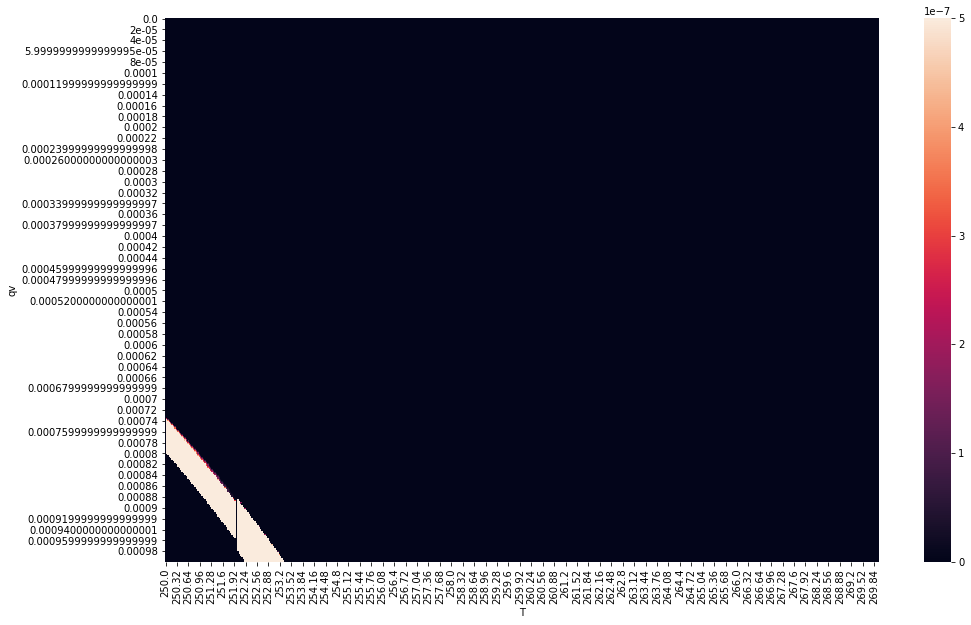

In [4]:
sns.heatmap(df.pivot("qv", "T", "delta_q"))

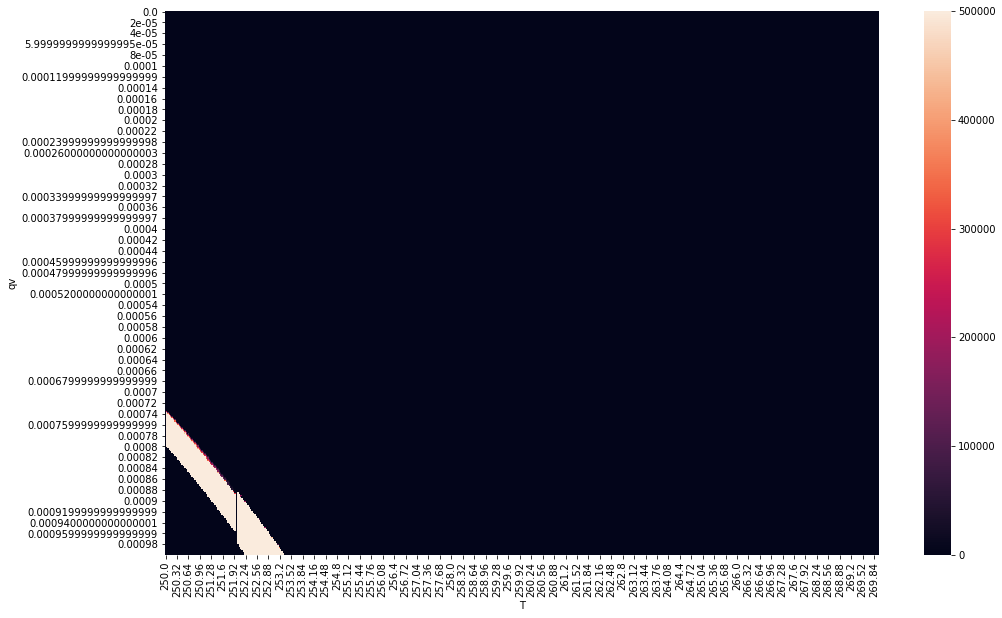

In [5]:
sns.heatmap(df.pivot("qv", "T", "delta_n"))

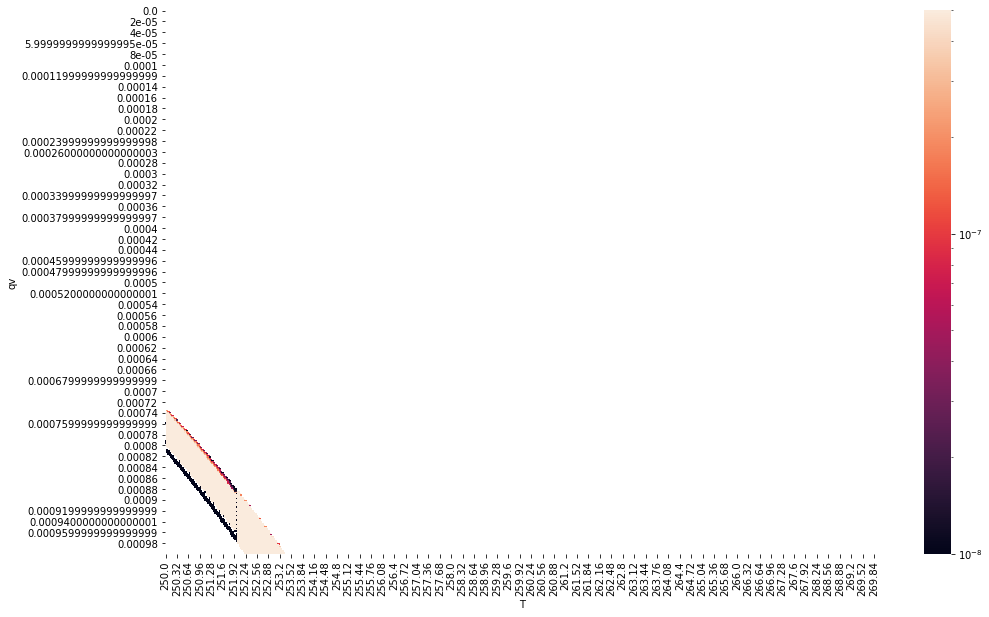

In [6]:
log_norm = LogNorm(vmin=df["delta_q"].min()+0.0001, vmax=df["delta_q"].max())

sns.heatmap(df.pivot("qv", "T", "delta_q"), norm=log_norm, vmin=0.00000001)

In [7]:
%matplotlib widget

fig = plt.figure(figsize=(8, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(df['qv'], df['T'], df['Sat_ice'], cmap=plt.cm.viridis, linewidth=0.2)
# fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
completed = sb.run(
    ["build/apps/src/scratch/scan", 
        "ice_table", "100", "20"], 
    capture_output=True,
    encoding="utf-8")
df = pd.read_csv(StringIO(completed.stdout), sep=",")
df.describe()

,x,y,dust,soot,orga
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,49.500000,9.500000,0.000153,0.000002,6.020130e-07
std,28.873289,5.767723,0.000926,0.000038,8.935832e-06
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,24.750000,4.750000,0.000000,0.000000,0.000000e+00
50%,49.500000,9.500000,0.000000,0.000000,0.000000e+00
75%,74.250000,14.250000,0.000000,0.000000,0.000000e+00
max,99.000000,19.000000,0.015800,0.000844,1.990000e-04


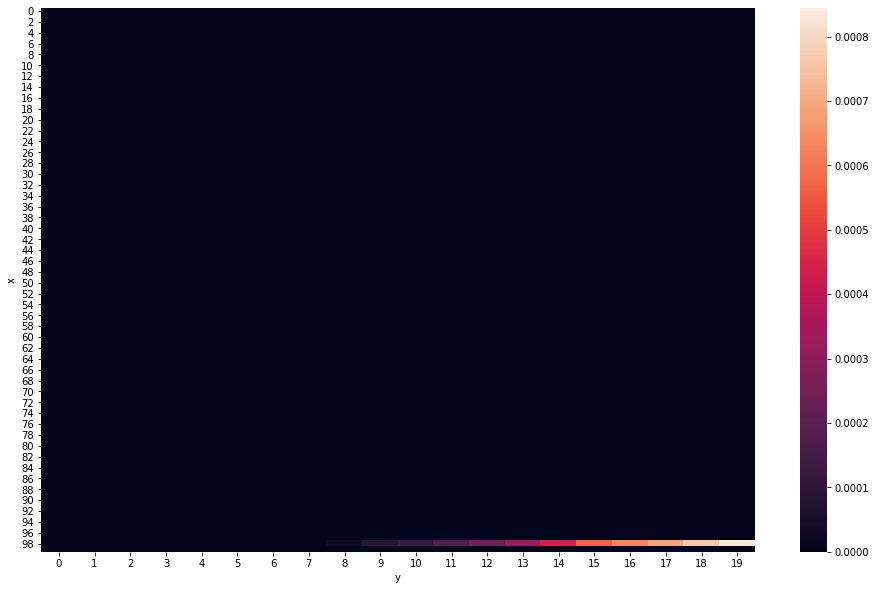

In [6]:
sns.heatmap(df.pivot("x", "y", "soot"))

In [26]:
completed = sb.run(
    ["build/apps/src/scratch/scan", 
        "infrac_scan", "400", "0", "180", "274"], 
    capture_output=True,
    encoding="utf-8")
df = pd.read_csv(StringIO(completed.stdout), sep=",")
df.describe()

,x,y,T,dust,soot,orga
count,400.0,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,98.0,20.089419,226.882500,0.021005,0.001167,2.759918e-04
std,0.0,9.630952,27.169361,0.015543,0.000883,2.066856e-04
min,98.0,0.117500,180.000000,0.000000,0.000000,7.410985e-323
25%,98.0,11.838125,203.441250,0.003171,0.000165,3.868412e-05
50%,98.0,23.558750,226.882500,0.022329,0.001217,2.857625e-04
75%,98.0,29.000000,250.323750,0.037300,0.002100,4.950000e-04
max,98.0,29.000000,273.765000,0.037300,0.002100,4.950000e-04


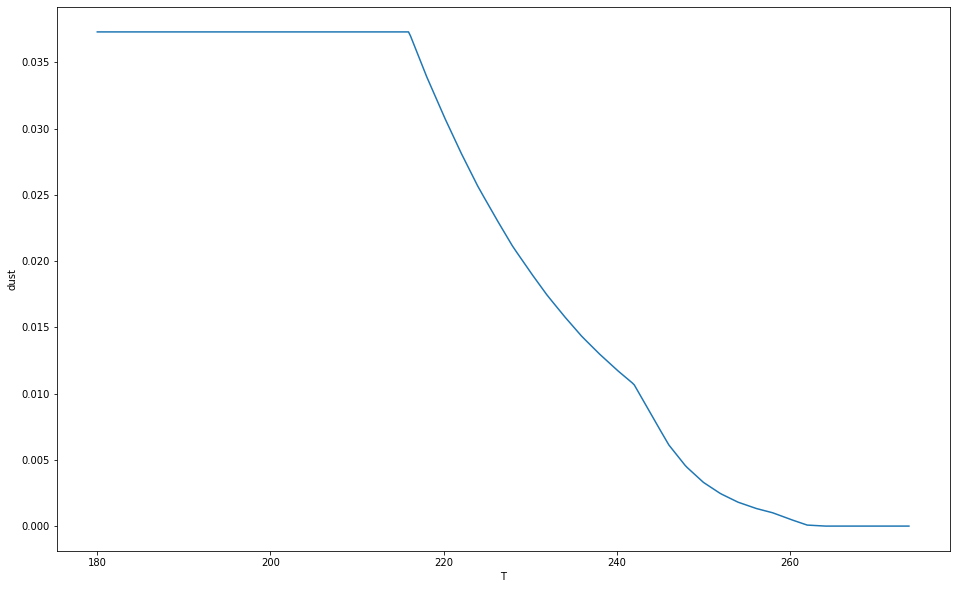

In [27]:
sns.lineplot(x="T", y="dust", data=df)

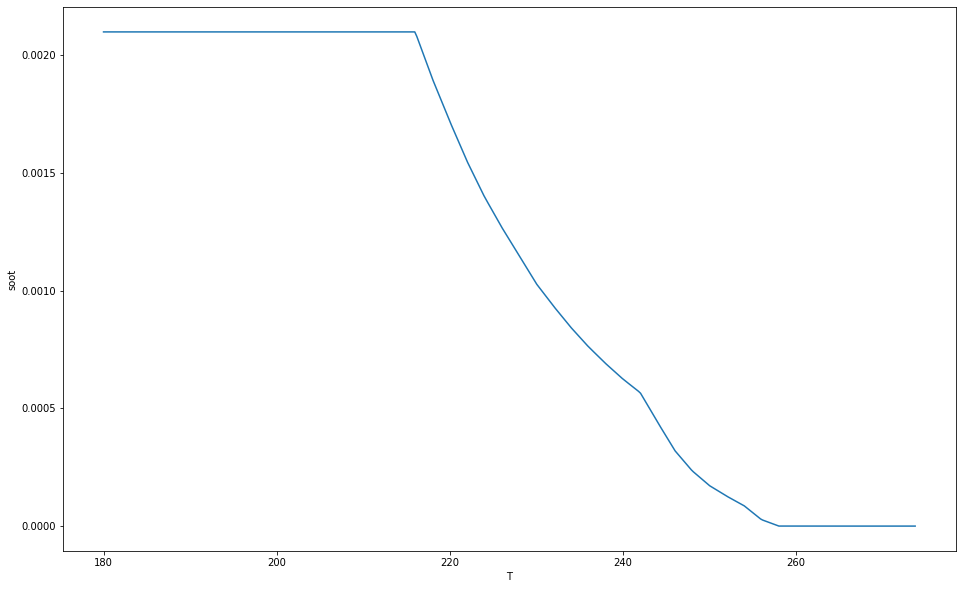

In [28]:
sns.lineplot(x="T", y="soot", data=df)

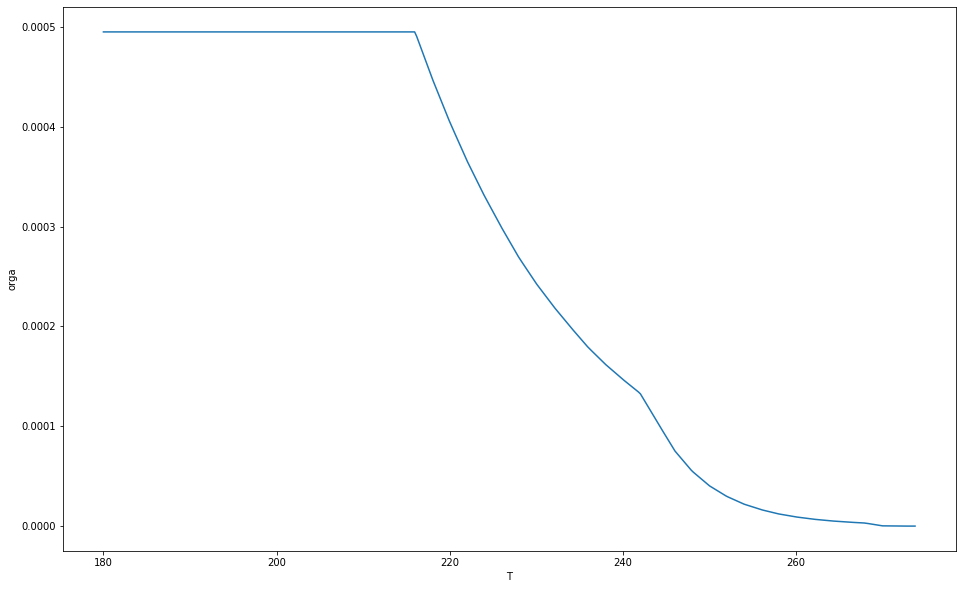

In [29]:
sns.lineplot(x="T", y="orga", data=df)